### Part 1:

#### Install and import libraries

In [11]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt


/content/drive/MyDrive/NN/HW3


#### load and show data

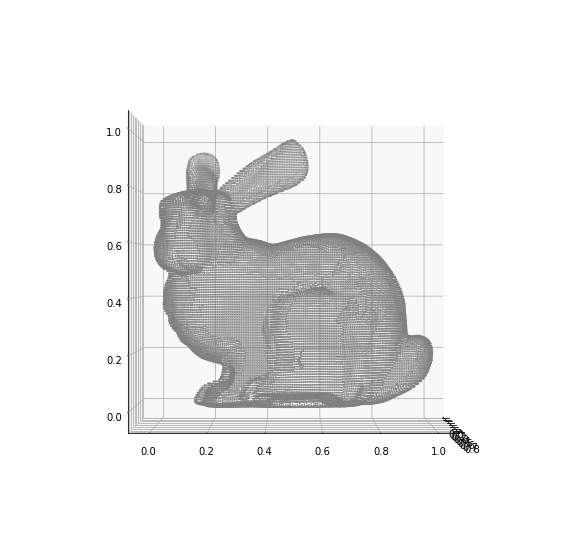

In [ ]:
data = np.load('bunny.npy')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 2], data[:, 0], data[:, 1], c='gray', s=0.5)
ax.view_init(0, 0)
plt.show()

#### Train SOM in defferent epochs

after 1 epochs: 
 [ 35947 / 35947 ] 100% - 0:00:00 left 
 quantization error: 0.0141642374191907


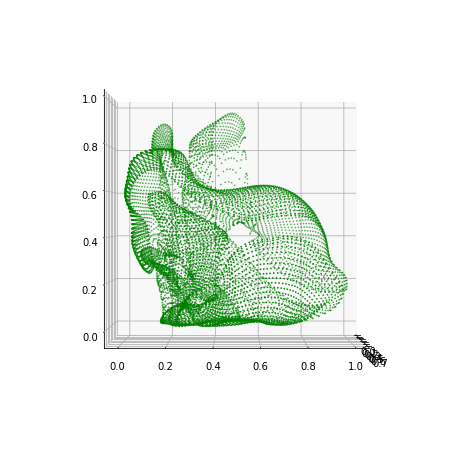

after 2 epochs: 
 [ 71894 / 71894 ] 100% - 0:00:00 left 
 quantization error: 0.012091256916729274


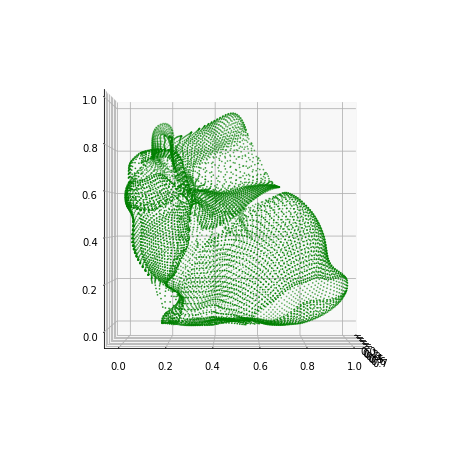

after 3 epochs: 
 [ 107841 / 107841 ] 100% - 0:00:00 left 
 quantization error: 0.010991221143306994


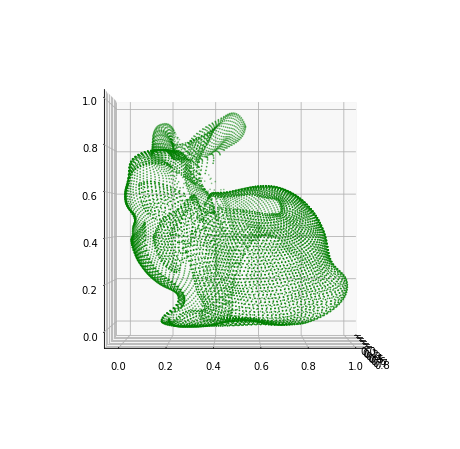

In [ ]:
epoch = 3

for i in range(1, epoch+1):
    print("after {} epochs: ".format(i))
    som = MiniSom(100, 100, data.shape[1], sigma=6, learning_rate=0.1, topology='rectangular', random_seed=0)
    som.train(data, data.shape[0]*i, verbose=True, random_order=True)  # random training

    weights = som.get_weights()
    surface = weights.reshape(weights.shape[0]*weights.shape[1], 3)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(surface[:, 2], surface[:, 0], surface[:, 1], c='green', s=0.5)
    ax.view_init(0, 0)
    plt.show()

### Part 2: Clustring

#### Import libraries

In [13]:
from keras.datasets import mnist

from matplotlib.patches import RegularPolygon, Ellipse
from matplotlib import cm, colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable

#### load dataset

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])[:, :]
print('train data shape: ' + str(x_train.shape))
print('train labels shape: ' + str(y_train.shape))

train data shape: (10000, 784)
train labels shape: (10000,)


#### Functions to plot som results

In [15]:
def plot_umatrix(som):
    xx, yy = som.get_euclidean_coordinates()
    umatrix = som.distance_map()
    weights = som.get_weights()

    f = plt.figure(figsize=(10,10))
    ax = f.add_subplot(111)
    ax.set_aspect('equal')

    # iteratively add hexagons
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            wy = yy[(i, j)] * np.sqrt(3) / 2
            hex = RegularPolygon((xx[(i, j)], wy), 
                                numVertices=6, 
                                radius=.95 / np.sqrt(3),
                                facecolor=cm.gray(umatrix[i, j]), 
                                edgecolor='gray')
            ax.add_patch(hex)

    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            plt.plot(i, j * np.sqrt(3) / 2)
    plt.title('U-matrix')

    xrange = np.arange(0, weights.shape[0]+1, 10)
    yrange = np.arange(0, weights.shape[1]+1, 10)
    plt.xticks(xrange-.5, xrange)
    plt.yticks(yrange * np.sqrt(3) / 2, yrange)

    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
    cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.gray, 
                                orientation='vertical')
    plt.gcf().add_axes(ax_cb)
    plt.show()


def plot_clustered_data(som, data):
    wmap = {}
    for x, t in zip(x_train, y_train):  # scatterplot
        w = som.winner(x)
        if w in wmap.keys():
          wmap[w].append(t)
        else:
          wmap[w] = [t]

    plt.figure(figsize=(10, 10))
    for w in wmap.keys():
        label = max(set(wmap[w]), key = wmap[w].count)
        plt.text(w[0]+.5,  w[1]+.5,  str(label), color=plt.cm.rainbow(label / 10.), fontdict={'weight': 'bold',  'size': 11})
    plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
    plt.title('clustered data')
    plt.show()

#### Train SOM and find best dimetions

SOM dimension: 20*20
 [ 30000 / 30000 ] 100% - 0:00:00 left 

/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)



 quantization error: 2161.5216848666473


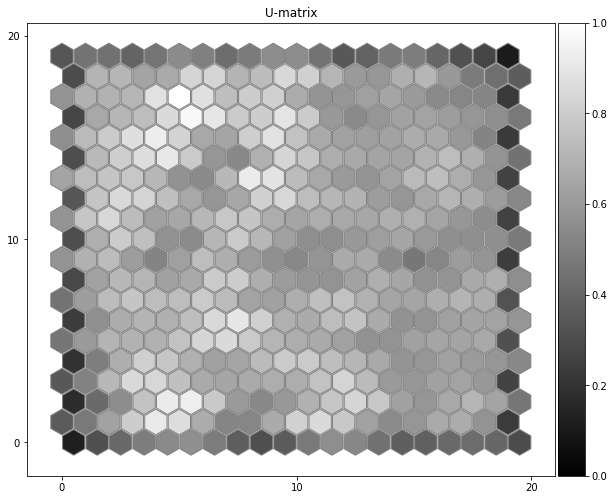

SOM dimension: 30*30
 [ 30000 / 30000 ] 100% - 0:00:00 left 
 quantization error: 2137.632824077391


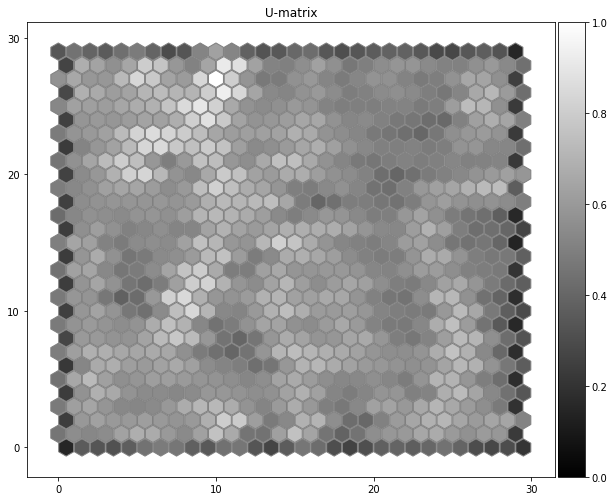

SOM dimension: 40*40
 [ 30000 / 30000 ] 100% - 0:00:00 left 
 quantization error: 2209.582103534261


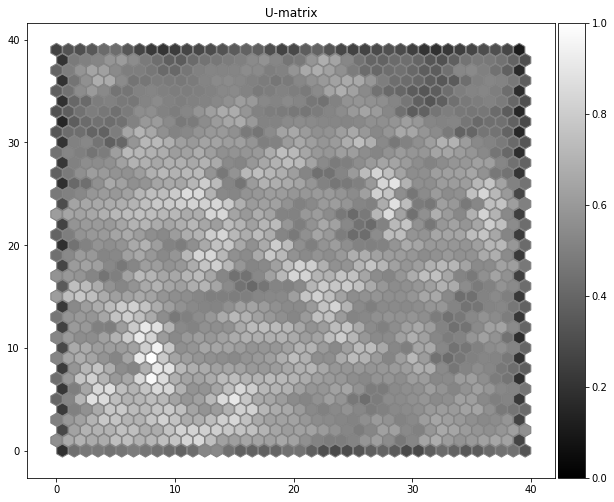

SOM dimension: 50*50
 [ 30000 / 30000 ] 100% - 0:00:00 left 
 quantization error: 2173.79363868003


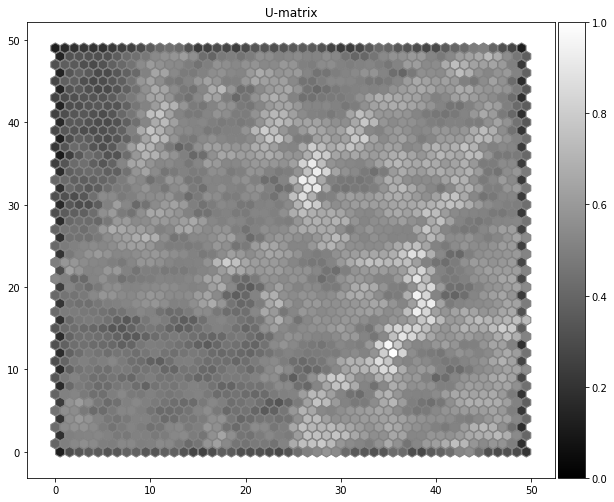

SOM dimension: 60*60
 [ 30000 / 30000 ] 100% - 0:00:00 left 
 quantization error: 2173.2782353231064


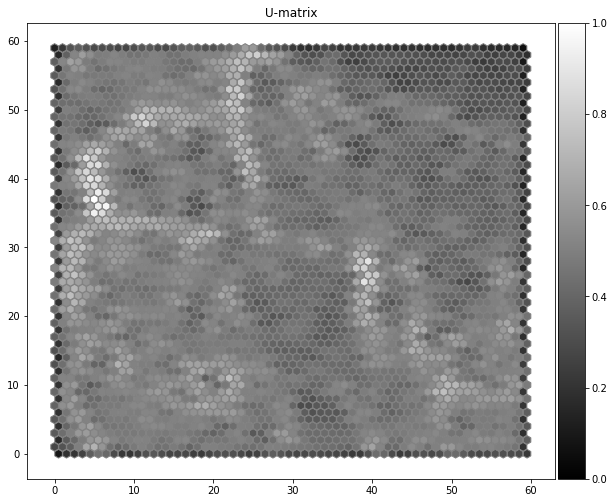

SOM dimension: 70*70
 [ 30000 / 30000 ] 100% - 0:00:00 left 
 quantization error: 2128.769152465418


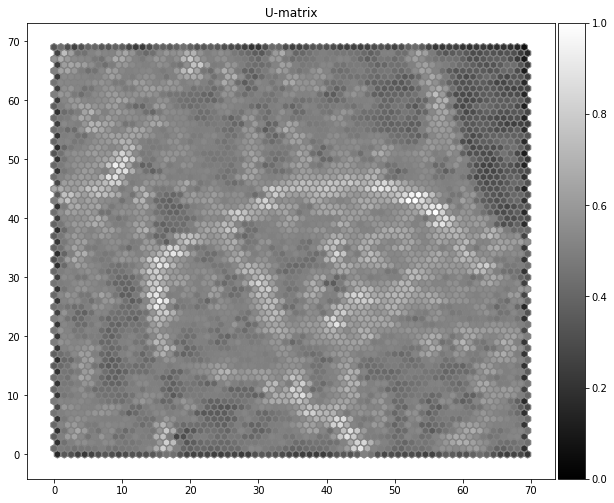

SOM dimension: 80*80
 [ 30000 / 30000 ] 100% - 0:00:00 left 
 quantization error: 2151.0548089214612


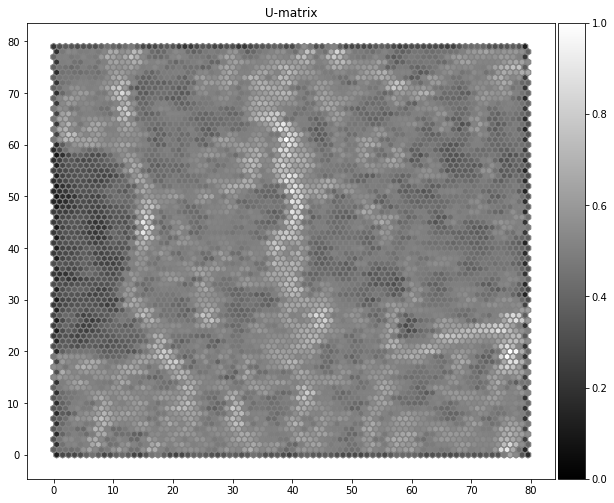

SOM dimension: 90*90
 [ 30000 / 30000 ] 100% - 0:00:00 left 
 quantization error: 2179.3151983171065


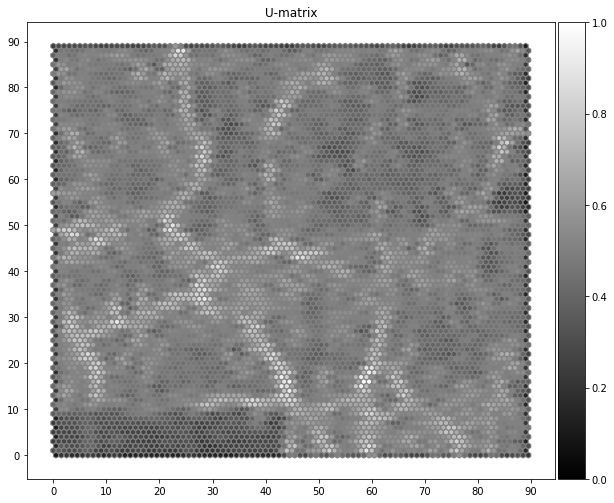

In [ ]:
for som_dim in [20, 30, 40, 50, 60, 70, 80, 90, 100]:
    print("SOM dimension: {0}*{1}".format(som_dim, som_dim))
    som = MiniSom(som_dim, som_dim, x_train.shape[1], sigma=5, learning_rate=0.5, topology='hexagonal', random_seed=0)
    som.train(x_train, x_train.shape[0]*3, verbose=True, random_order=True)  # random training

    plot_umatrix(som)

#### Plot matrix-U and clustered data

In [ ]:
best_som_dim = 90
som = MiniSom(best_som_dim, best_som_dim, x_train.shape[1], sigma=5, learning_rate=0.5, topology='hexagonal', random_seed=0)
som.train(x_train, x_train.shape[0]*3, verbose=True, random_order=True)  # random training

 [ 28825 / 30000 ]  96% - 0:01:59 left 

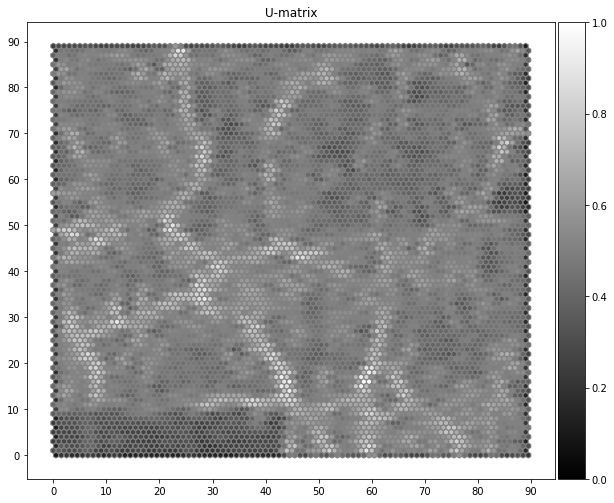

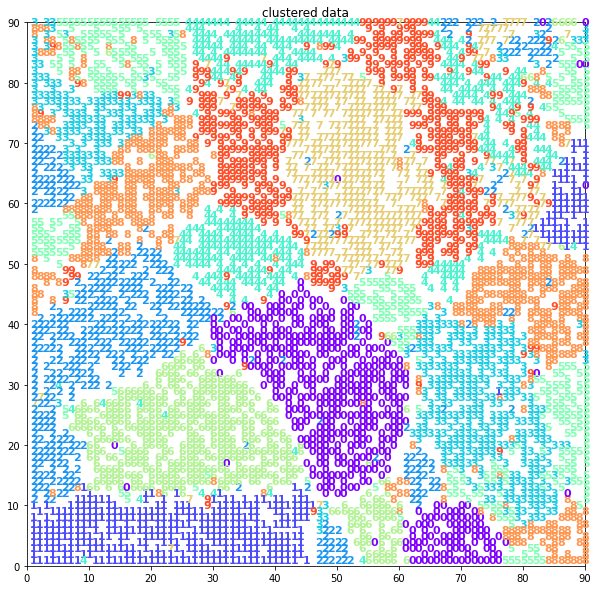

In [20]:
plot_umatrix(som)
plot_clustered_data(som, x_train)